In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [5]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### カテゴリカルデータと量的データを把握する

* カテゴリカルデータ

    * 名義尺度(nominal)： Survived, Sex

    * 順序尺度(ordinal)： Pclass
<br>
* 量的データ

    * 連続値(continuous): Age, Fare

    * 離散値(discrete): SibSp, Parch

### 混在したタイプのデータを把握する
* Tickets

    数値とアルファベットが混在

### エラーやタイポを含むデータを把握する

In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Cabinは欠損値が多いので除外した方が良い

# 訓練データのnull数
print(train_df.isnull().sum())
print('_'*40)
# テストデータのnull数
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### 変数の型を確認する
stringsはobjectで表示

In [8]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [9]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
# 8割弱の乗客が両親や子供、兄弟や配偶者と一緒に搭乗していなかった。（単身）
# Parch: 両親、子供の数
# SibSp: 兄弟、配偶者の数
pd.crosstab(train_df['SibSp'], train_df['Parch'], normalize='columns')

Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,0.792035,0.322034,0.3625,0.2,0.25,0.4,0.0
1,0.181416,0.483051,0.2375,0.6,0.75,0.6,1.0
2,0.023599,0.059322,0.0500,0.2,0.00,0.0,0.0
3,0.002950,0.059322,0.0875,0.0,0.00,0.0,0.0
4,0.000000,0.076271,0.1125,0.0,0.00,0.0,0.0
5,0.000000,0.000000,0.0625,0.0,0.00,0.0,0.0
8,0.000000,0.000000,0.0875,0.0,0.00,0.0,0.0


In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


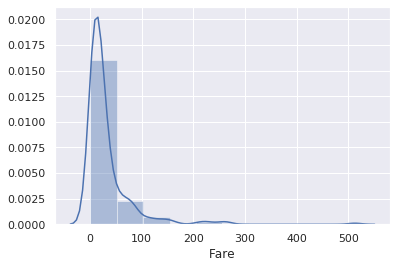

In [12]:
# Fareの分布
# 運賃については高い金額を払った人間が少ない
# 0-50が８割以上を占めている
sns.distplot(train_df['Fare'],
             kde=True, rug=False, bins=10)

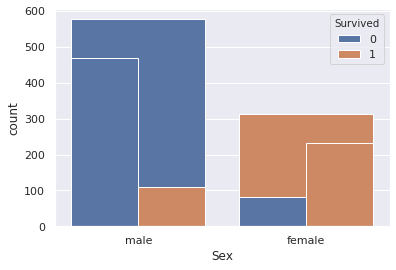

In [13]:
# Sexの分布
# 女性が生き残ったことが分かる
sns.countplot(train_df['Sex'])
sns.countplot(train_df['Sex'], hue=train_df['Survived'])

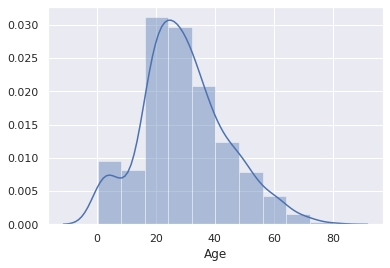

In [14]:
# そもそもの分布としてAgeは子供の部分で山がある
train_df_omit_age = train_df.dropna(subset=['Age'])
sns.distplot(train_df_omit_age['Age'],
             kde=True, rug=False, bins=10)

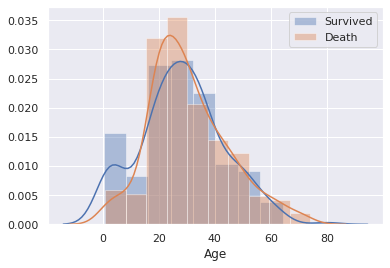

In [15]:
# 年齢による生存率は明らかに年齢の20歳より小さい人は生存している確率が
# 高いことは分かる
sns.distplot(train_df_omit_age[train_df_omit_age['Survived']==1]['Age'],
             kde=True, rug=False, bins=10, label='Survived')
sns.distplot(train_df_omit_age[train_df_omit_age['Survived']==0]['Age'],
             kde=True, rug=False, bins=10, label='Death')
plt.legend()

In [16]:
# 重複をチェック
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",male,347082,B96 B98,S
freq,1,577,7,4,644


In [17]:
train_df[['Pclass', 'Survived']]\
    .groupby(['Pclass'], as_index=False)\
    .mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_df[['Sex', 'Survived']]\
    .groupby(['Sex'], as_index=False)\
    .mean().sort_values(by='Survived', ascending=False)

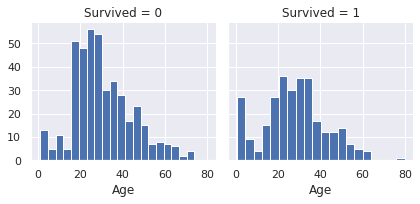

In [19]:
# 4歳以下はかなりの数生き残っている
# 15〜20歳が逆に死んでいる 
# 20〜30歳辺りまでも死亡率は高いがそれ以降は年齢による
# 生死に特徴は見られなくなる
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


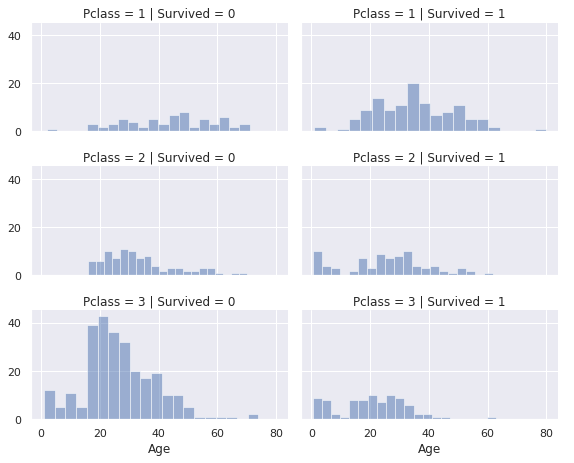

In [22]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',
                    size=2.2, aspect=1.8)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


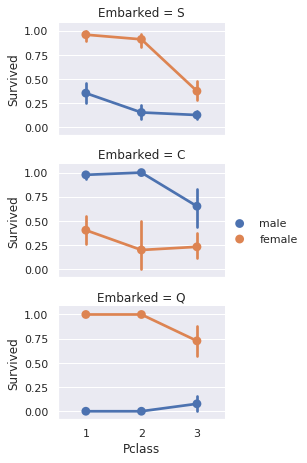

In [23]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()


/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


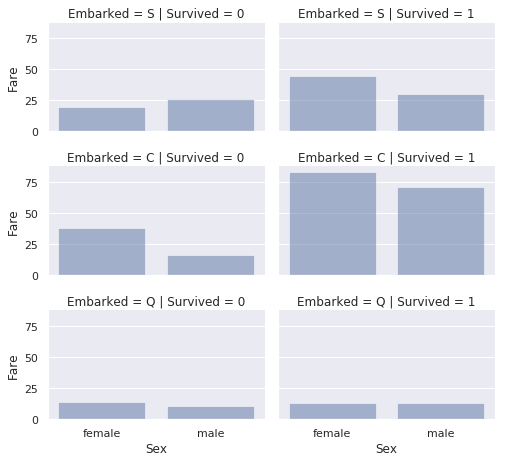

In [24]:
# 明らかにどの港から出発していても運賃が高い場合には生き残る確率が高くなっている
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived',
                     size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [30]:
print("Before",
      train_df.shape,
      test_df.shape,
      combine[0].shape,
      combine[1].shape
      )

train_df_omit_tiket_cabin = train_df.drop(['Ticket',
                                           'Cabin'], axis=1)
test_df_omit_tiket_cabin = test_df.drop(['Ticket',
                                         'Cabin'], axis=1)
combine = [train_df_omit_tiket_cabin, test_df_omit_tiket_cabin]

print("After",
      train_df_omit_tiket_cabin.shape,
      test_df_omit_tiket_cabin.shape,
      combine[0].shape,
      combine[1].shape)
      

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [32]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',
                                                expand=False)
pd.crosstab(train_df_omit_tiket_cabin['Title'],
            train_df_omit_tiket_cabin['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [41]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace([
        'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df_omit_tiket_cabin[['Title', 'Survived']]\
    .groupby(['Title'], as_index=False).mean()

,Title,Survived
0,0.0,0.383838


In [43]:
title_mapping = {"Mr": 1,
                 "Miss": 2,
                 "Mrs": 3,
                 "Master": 4,
                 "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df_omit_tiket_cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0.0
